In [7]:
import dash
from dash import html
from dash import dcc
import plotly.express as px
import pandas as pd
from matplotlib.font_manager import fontManager

/home/vscode/.local/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning:

Glyph 23548 (\N{CJK UNIFIED IDEOGRAPH-5BFC}) missing from current font.

/home/vscode/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 23548 (\N{CJK UNIFIED IDEOGRAPH-5BFC}) missing from current font.



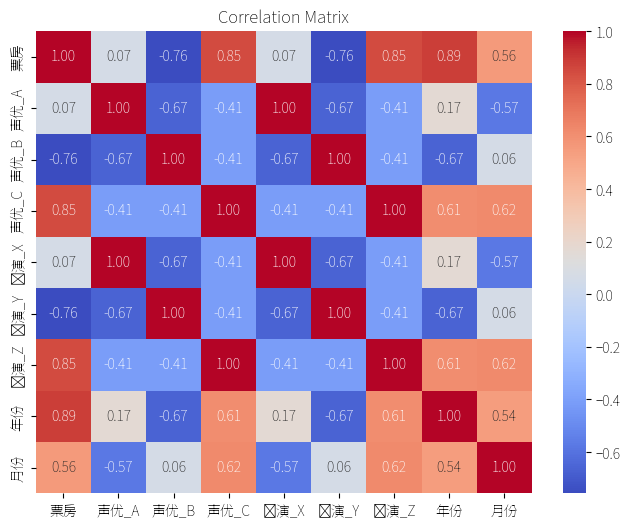

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fontManager.addfont('NotoSansTC-VariableFont_wght.ttf')
plt.rc('font', family='Noto Sans TC')


# 创建示例数据集
data = {
    '声优': ['A', 'B', 'A', 'C', 'B'],
    '导演': ['X', 'Y', 'X', 'Z', 'Y'],
    '年月': ['2022年1月', '2022年3月', '2023年5月', '2023年8月', '2022年7月'],
    '票房': [10000000, 8000000, 12000000, 15000000, 9000000]
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 对声优、导演进行独热编码
df = pd.get_dummies(df, columns=['声优', '导演'])

# 处理年月数据（这里仅简单示范，实际上可以进行更复杂的时间处理）
df['年份'] = df['年月'].str.extract(r'(\d+)年').astype(int)
df['月份'] = df['年月'].str.extract(r'(\d+)月').astype(int)

# 排除不适合计算相关性的列
df_for_corr = df.drop(columns=['年月'])

# 计算相关性矩阵
correlation_matrix = df_for_corr.corr()

# 绘制相关性矩阵的热力图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()